In [1]:
%run ../../shared_setup.ipynb

docker image cggh/biipy:v1.6.0


In [2]:
callsets = load_callsets(COMBINED_CALLSET_FN_TEMPLATE, 
                         variant_filter='FILTER_PASS',
                         call_filter=combined_conf_calls,
                         sample_exclusions=dup_samples)

2016-03-08 22:29:10.899239 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/3d7_hb3.combined.final.npz
2016-03-08 22:29:11.225759 :: filter variants: excluding 157 (0.4%) retaining 42087 (99.6%) of 42244 variants
2016-03-08 22:29:11.242567 :: filter samples: excluding ['C01/PG0062-C/ERR019070', 'C02/PG0053-C/ERR019067', 'C02/PG0055-C/ERR019066', 'C02/PG0056-C/ERR019068'] including ['3D7/PG0051-C/ERR019061', 'HB3/PG0052-C/ERR019054', 'C01/PG0065-C/ERR019064', 'C02/PG0067-C/ERR019073', 'C03/PG0066-C/ERR019072', 'C04/PG0061-C/ERR019059', 'C05/PG0068-C/ERR019065', 'C06/PG0069-C/ERR019055', 'C07/PG0070-C/ERR019056', 'C08/PG0071-C/ERR019074', 'C09/PG0072-C/ERR019057', 'C10/PG0063-C/ERR019060', 'C11/PG0064-C/ERR019071', 'C12/PG0058-C/ERR019063', 'C13/PG0054-C/ERR019062', 'C14/PG0060-C/ERR019058', 'C15/PG0057-C/ERR019069']
2016-03-08 22:29:11.292490 :: filter calls: excluding 2216 (0.3%) retaining 713263 (99.7%) of 715479 calls
2016-03-08 22:29:11.293529 :: loading /data

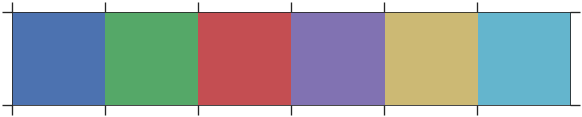

In [3]:
palette = sns.color_palette()
sns.palplot(palette);

In [4]:
def plot_block_dist(cross, ax=None):

    v, c, c2d = unpack_callset(callsets[cross])

    _, _, tbl_blocks = haplotypes(v, c)
    tbl_blocks = (
        tbl_blocks
        .ne('prv_inheritance', -1)
        .ne('nxt_inheritance', -1)
    )

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 4))
        sns.despine(ax=ax, offset=5)
    bins = np.logspace(2, 6.5, 25)

    v1 = tbl_blocks.eq('inheritance', INHERITANCE_PARENT1).values('length_min').array()
    v2 = tbl_blocks.eq('inheritance', INHERITANCE_PARENT2).values('length_min').array()
    ax.hist([v1, v2], stacked=True, bins=bins, color=[palette[0], palette[2]], rwidth=1)

    ax.set_xscale('log')
    ax.set_xlim(100, 4000000)

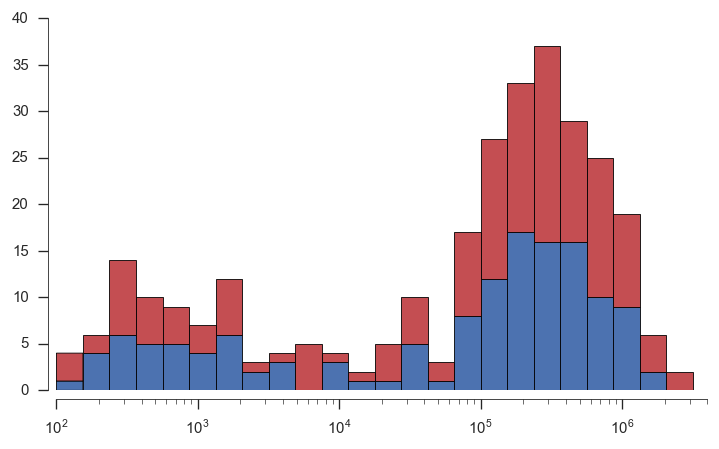

In [5]:
plot_block_dist('3d7_hb3')

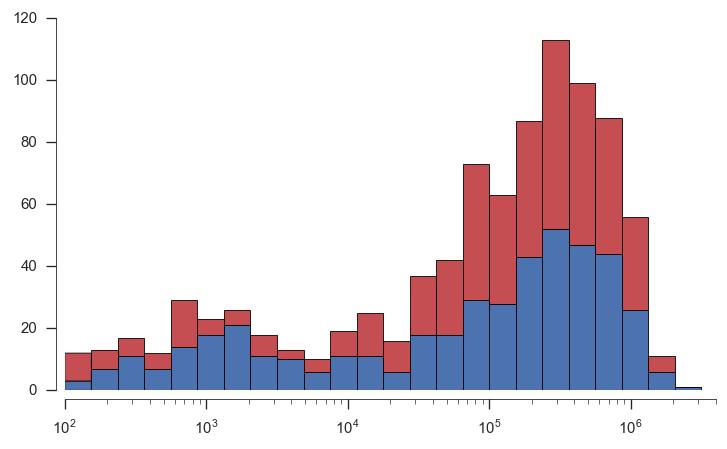

In [6]:
plot_block_dist('hb3_dd2')

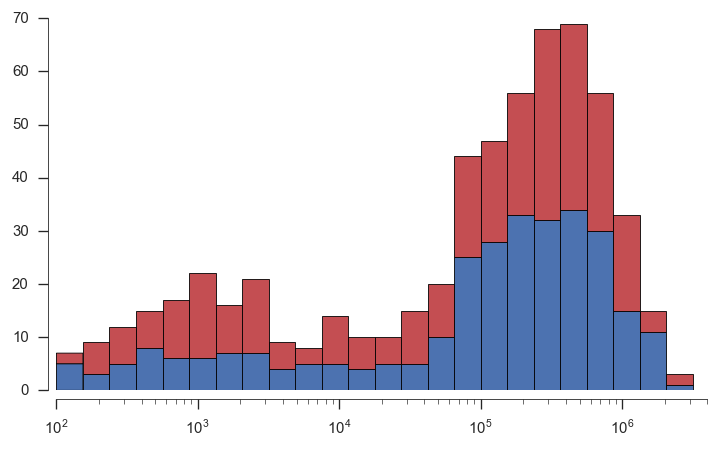

In [7]:
plot_block_dist('7g8_gb4')

In [8]:
def plot_block_dist_all(ax=None):

    tbl_blocks = None
    for cross in CROSSES:
        v, c, c2d = unpack_callset(callsets[cross])
        _, _, tbl_blocks_cross = haplotypes(v, c)
        if tbl_blocks is None:
            tbl_blocks = tbl_blocks_cross
        else:
            tbl_blocks = tbl_blocks.cat(tbl_blocks_cross)

    tbl_blocks = (
        tbl_blocks
        .ne('prv_inheritance', -1)
        .ne('nxt_inheritance', -1)
    )

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 4))
        sns.despine(ax=ax, offset=5)
    bins = np.logspace(2, 6.5, 25)

    v = tbl_blocks.values('length_min').array()
    ax.hist(v, bins=bins, color=palette[1], rwidth=1)

#     mu = ((1/12) / 100) / 1000
#     rv = scipy.stats.expon(scale=1/mu)
#     n = tbl_blocks.n
#     ve = rv.rvs(n)
#     ax.hist(ve, bins=bins, color='k', histtype='step')

    ax.set_xscale('log')
    ax.set_xlim(100, 4000000)

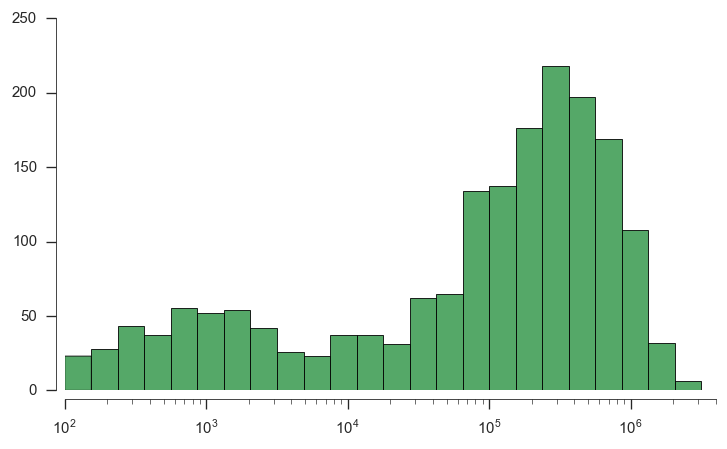

In [9]:
plot_block_dist_all()

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:492: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


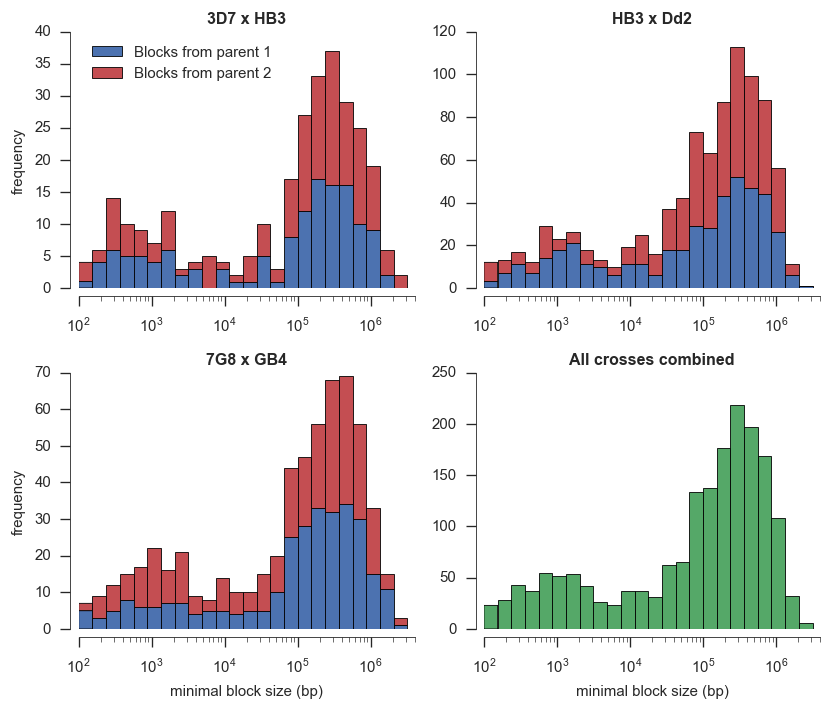

In [10]:
fig = plt.figure(figsize=(7, 6))

rows, cols = 2, 2

ax = fig.add_subplot(rows, cols, 1)
sns.despine(ax=ax, offset=5)
plot_block_dist('3d7_hb3', ax=ax)
ax.set_ylabel('frequency')
ax.set_title('3D7 x HB3', fontweight='bold')
h1 = plt.Rectangle((0, 0), 1, 1, color='b', label='parent 1')
h2 = plt.Rectangle((0, 0), 1, 1, color='r', label='parent 2')
ax.legend([h1, h2], labels=['Blocks from parent 1', 'Blocks from parent 2'], loc='upper left')

ax = fig.add_subplot(rows, cols, 2)
sns.despine(ax=ax, offset=5)
plot_block_dist('hb3_dd2', ax=ax)
# ax.set_ylabel('frequency')
ax.set_title('HB3 x Dd2', fontweight='bold')

ax = fig.add_subplot(rows, cols, 3)
sns.despine(ax=ax, offset=5)
plot_block_dist('7g8_gb4', ax=ax)
ax.set_ylabel('frequency')
ax.set_xlabel('minimal block size (bp)')
ax.set_title('7G8 x GB4', fontweight='bold')

ax = fig.add_subplot(rows, cols, 4)
sns.despine(ax=ax, offset=5)
plot_block_dist_all(ax=ax)
# ax.set_ylabel('frequency')
ax.set_xlabel('minimal block size (bp)')
ax.set_title('All crosses combined', fontweight='bold')

fig.tight_layout()

fn = '../../artwork/supp/block_length.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)


In [23]:
# assume CO rate 12 kb/cM
# convert to Morgan / Mb
((1/12) / 100) * 1000

0.8333333333333333

In [24]:
# convert to rate (Morgan / b)
mu = ((1/12) / 100) / 1000
mu

8.333333333333333e-07

In [25]:
rv = scipy.stats.expon(scale=1/mu)

In [26]:
n_progeny = {cross: len(callsets[cross]['calldata'].dtype.names) - 2 for cross in CROSSES}
n_progeny

{'3d7_hb3': 15, '7g8_gb4': 28, 'hb3_dd2': 35}

In [27]:
n_prog_tot = sum(n_progeny.values())
n_prog_tot

78

In [28]:
tbl_regions_1b

0|region_chrom,1|region_start,2|region_stop,3|region_type,4|region_size
Pf3D7_01_v3,1,27336,SubtelomericRepeat,27336
Pf3D7_01_v3,27337,92900,SubtelomericHypervariable,65564
Pf3D7_01_v3,92901,457931,Core,365031
Pf3D7_01_v3,457932,460311,Centromere,2380
Pf3D7_01_v3,460312,575900,Core,115589


In [29]:
n_bases = tbl_regions_1b.eq('region_type', 'Core').values('region_size').sum()
n_bases

20782107

In [30]:
# expected number of crossovers
n_co = n_prog_tot * n_bases * mu
n_co

1350.836955

5000 6
10000 10
20000 22


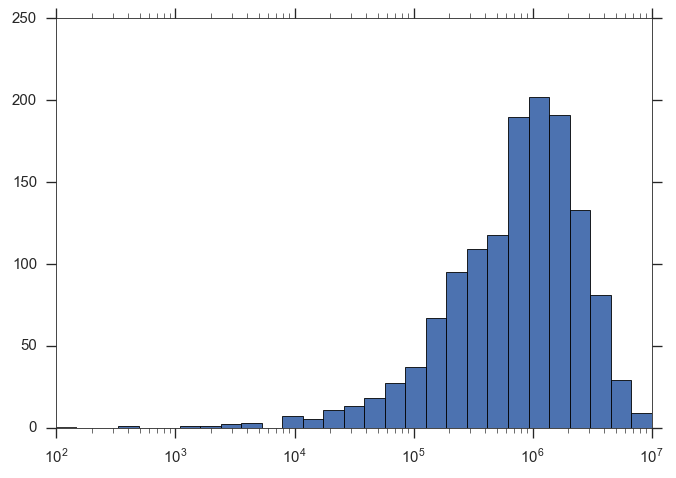

In [31]:
x = rv.rvs(n_co)
bins = np.logspace(2, 7, 30)
plt.hist(x, bins=bins)
plt.xscale('log')
for l in 5000, 10000, 20000: print(l, nnz(x < l))

In [32]:
for l in 5000, 10000, 20000:
    e = rv.cdf(l) * n_co
    print(l, e, e/n_co, rv.cdf(l))

5000 5.61677756645 0.00415799815489 0.00415799815489
10000 11.2102005821 0.00829870736112 0.00829870736112
20000 22.3273709902 0.0165285461784 0.0165285461784
